In [ ]:
## Initial imports 
import pandas as pd
import numpy as np
from pathlib import Path
import datetime as dt
import os

In [ ]:
#import csv path
current_dir = os.getcwd()
data_path = os.path.join(current_dir, "Resources", "whale_returns.csv")
print(data_path)

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [ ]:
#Read the Whale Portfolio daily returns and clean the data.
whale_returns_csv = "Resources\whale_returns.csv"
whale_returns_df = pd.read_csv(whale_returns_csv)
whale_returns_df

In [ ]:
# Count nulls
whale_return_nan_count = whale_returns_df.isnull().sum()
whale_return_nan_count

In [ ]:
# Drop nulls
whale_return_dropnan_df = whale_returns_df.dropna()
whale_return_dropnan_df

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [ ]:
#Read the algorithmic daily returns and clean the data.

algo_returns_csv = "./Resources/algo_returns.csv"
algo_returns_df = pd.read_csv(algo_returns_csv)
algo_returns_df

In [ ]:
# Count nulls
algo_return_nan_count = algo_returns_df.isnull().sum()
algo_return_nan_count

In [ ]:
# Drop nulls
algo_return_dropnan_df = algo_returns_df.dropna()
algo_return_dropnan_df

## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [ ]:
#Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 
sp_tsx_history_csv = "Resources\sp_tsx_history.csv"
sp_tsx_history_df = pd.read_csv(sp_tsx_history_csv)
sp_tsx_history_df

In [ ]:
# Check Data Types
sp_tsx_history_df.dtypes

In [ ]:
# Fix Data Types
sp_tsx_history_df["Close"] = sp_tsx_history_df["Close"].str.replace("$", "")
sp_tsx_history_df["Close"] = sp_tsx_history_df["Close"].str.replace(",", "")
sp_tsx_history_df["Close"] = sp_tsx_history_df["Close"].astype("float")
sp_tsx_history_df

In [ ]:
# Calculate Daily Returns

sp_tsx_history_df["Close"] = sp_tsx_history_df["Close"].pct_change()
sp_tsx_history_df


In [ ]:
# Drop nulls
sp_tsx_history_df = sp_tsx_history_df.dropna()
sp_tsx_history_df

In [ ]:
# Rename `Close` Column to be specific to this portfolio.
sp_tsx_history_df = sp_tsx_history_df.rename(columns = {"Close":"Daily Returns"})
sp_tsx_history_df

## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [24]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.

combined_data_df = pd.concat(
    [whale_return_dropnan_df, algo_return_dropnan_df, sp_tsx_history_df], axis='columns', join='inner'
)
combined_data_df


,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Date,Algo 1,Algo 2,Date,Daily Returns
6,2015-03-10,-0.010263,-0.005341,-0.012079,-0.009739,2014-06-05,0.004062,0.013285,10-Oct-2012,-0.004982
7,2015-03-11,0.004012,0.005163,0.003312,-0.001147,2014-06-06,0.001857,0.008284,11-Oct-2012,0.001763
8,2015-03-12,0.008265,0.010272,0.013117,0.010801,2014-06-09,-0.005012,0.005668,12-Oct-2012,-0.002608
9,2015-03-13,-0.002497,-0.001428,-0.003697,-0.008142,2014-06-10,0.004406,-0.000735,15-Oct-2012,0.002288
10,2015-03-16,0.007901,0.003583,0.007953,0.008055,2014-06-11,0.004760,-0.003761,16-Oct-2012,0.014533
...,...,...,...,...,...,...,...,...,...,...
1055,2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,2018-08-03,-0.003656,0.002817,13-Dec-2016,0.006382
1056,2019-04-26,0.008149,0.009162,0.012355,0.010434,2018-08-06,0.000529,0.000285,14-Dec-2016,-0.012225
1057,2019-04-29,0.001254,0.002719,0.006251,0.005223,2018-08-07,0.000207,-0.001330,15-Dec-2016,0.001390
1058,2019-04-30,-0.001295,-0.002211,-0.000259,-0.003702,2018-08-08,0.008429,-0.001812,16-Dec-2016,0.002227


# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:>

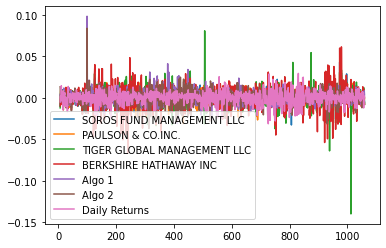

In [20]:
# Plot daily returns of all portfolios
#combined_data_df = combined_data_df.set_index['Date']
combined_data_df.plot()

#### Calculate and Plot cumulative returns.

In [ ]:
# Calculate cumulative returns of all portfolios

# Plot cumulative returns

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

In [ ]:
# Box plot to visually show risk

In [28]:
# Calculate the daily standard deviations of all portfolios
daily_std_combined_data = combined_data_df.std()
daily_std_combined_data 

SOROS FUND MANAGEMENT LLC      0.007855
PAULSON & CO.INC.              0.006988
TIGER GLOBAL MANAGEMENT LLC    0.010845
BERKSHIRE HATHAWAY INC         0.012850
Algo 1                         0.007745
Algo 2                         0.008265
Daily Returns                  0.007421
dtype: float64

In [29]:
# Calculate  the daily standard deviation of S&P TSX 60
daily_std_sp_tsx_df = sp_tsx_history_df.std()
daily_std_sp_tsx_df

# Determine which portfolios are riskier than the S&P TSX 60


Daily Returns    0.006637
dtype: float64

In [30]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std_combined_data = daily_std_combined_data *np.sqrt(252)
annualized_std_combined_data 

SOROS FUND MANAGEMENT LLC      0.124700
PAULSON & CO.INC.              0.110926
TIGER GLOBAL MANAGEMENT LLC    0.172156
BERKSHIRE HATHAWAY INC         0.203994
Algo 1                         0.122946
Algo 2                         0.131206
Daily Returns                  0.117809
dtype: float64

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

In [ ]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window

# Plot the rolling standard deviation

In [ ]:
# Calculate the correlation

# Display de correlation matrix

In [ ]:
# Calculate covariance of a single portfolio

# Calculate variance of S&P TSX

# Computing beta

# Plot beta trend

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [ ]:
# Use `ewm` to calculate the rolling window

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [ ]:
# Annualized Sharpe Ratios

In [ ]:
# Visualize the sharpe ratios as a bar plot